<a href="https://colab.research.google.com/github/tuxlimr/Celery_Preprocessing/blob/master/TimeSeries_inStocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [16]:
stock =  yf.download("^NSEI", period="5y")

[*********************100%%**********************]  1 of 1 completed


In [17]:
stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-15,10524.200195,10526.299805,10410.150391,10512.500000,10512.500000,259500
2018-10-16,10550.150391,10604.900391,10525.299805,10584.750000,10584.750000,265200
2018-10-17,10688.700195,10710.150391,10436.450195,10453.049805,10453.049805,284800
2018-10-19,10339.700195,10380.099609,10249.599609,10303.549805,10303.549805,357500
2018-10-22,10405.849609,10408.549805,10224.000000,10245.250000,10245.250000,297300
...,...,...,...,...,...,...
2023-10-09,19539.449219,19588.949219,19480.500000,19512.349609,19512.349609,165100
2023-10-10,19565.599609,19717.800781,19565.449219,19689.849609,19689.849609,216600
2023-10-11,19767.000000,19839.199219,19756.949219,19811.349609,19811.349609,213700


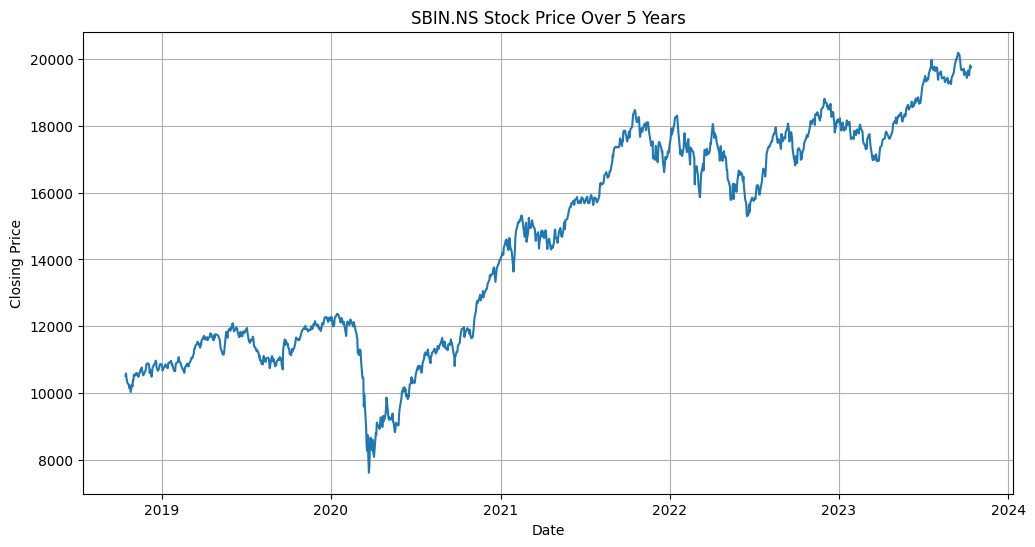

In [18]:
# Plot the closing price to observe seasonality
plt.figure(figsize=(12, 6))
plt.plot(stock['Close'])
plt.title('SBIN.NS Stock Price Over 5 Years')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid()
plt.show()

### Box plot and interquartile range

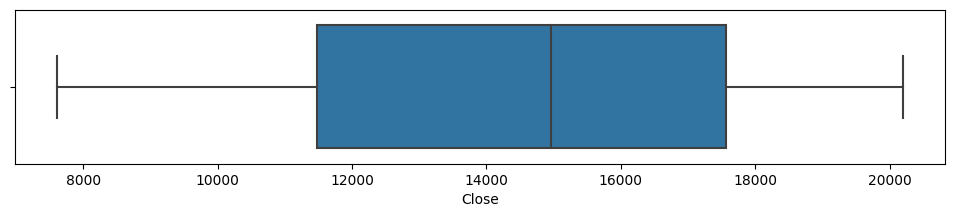

In [19]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=stock['Close'],whis=1.5)

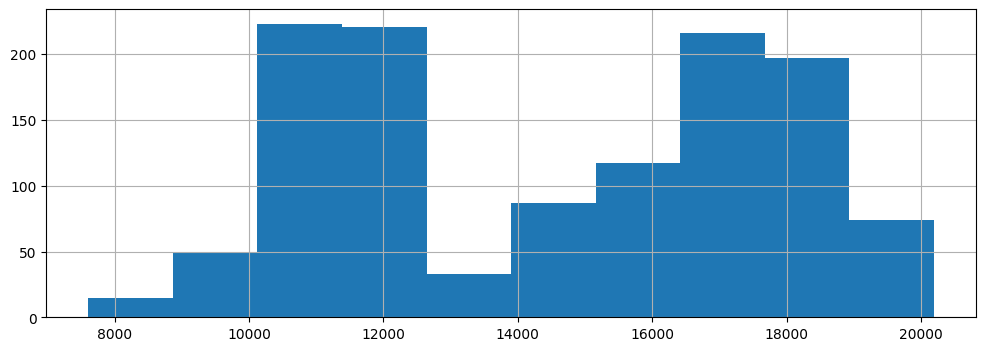

In [20]:
fig = stock.Close.hist(figsize = (12,4))

### Use Linear Interpolation

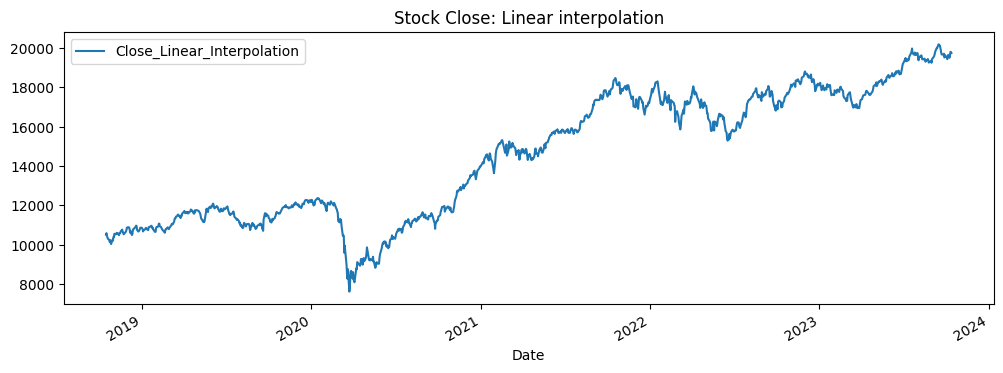

In [23]:
stock = stock.assign(Close_Linear_Interpolation=stock.Close.interpolate(method='linear'))
stock[['Close_Linear_Interpolation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Stock Close: Linear interpolation')
plt.show(block=False)

In [24]:
stock['Close'] = stock['Close_Linear_Interpolation']
stock.drop(columns=['Close_Linear_Interpolation'],inplace=True)

### Time Series decomposition

In [21]:
### Additive seasonal decomposition

In [26]:
stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-15,10524.200195,10526.299805,10410.150391,10512.500000,10512.500000,259500
2018-10-16,10550.150391,10604.900391,10525.299805,10584.750000,10584.750000,265200
2018-10-17,10688.700195,10710.150391,10436.450195,10453.049805,10453.049805,284800
2018-10-19,10339.700195,10380.099609,10249.599609,10303.549805,10303.549805,357500
2018-10-22,10405.849609,10408.549805,10224.000000,10245.250000,10245.250000,297300
...,...,...,...,...,...,...
2023-10-09,19539.449219,19588.949219,19480.500000,19512.349609,19512.349609,165100
2023-10-10,19565.599609,19717.800781,19565.449219,19689.849609,19689.849609,216600
2023-10-11,19767.000000,19839.199219,19756.949219,19811.349609,19811.349609,213700


[*********************100%%**********************]  1 of 1 completed


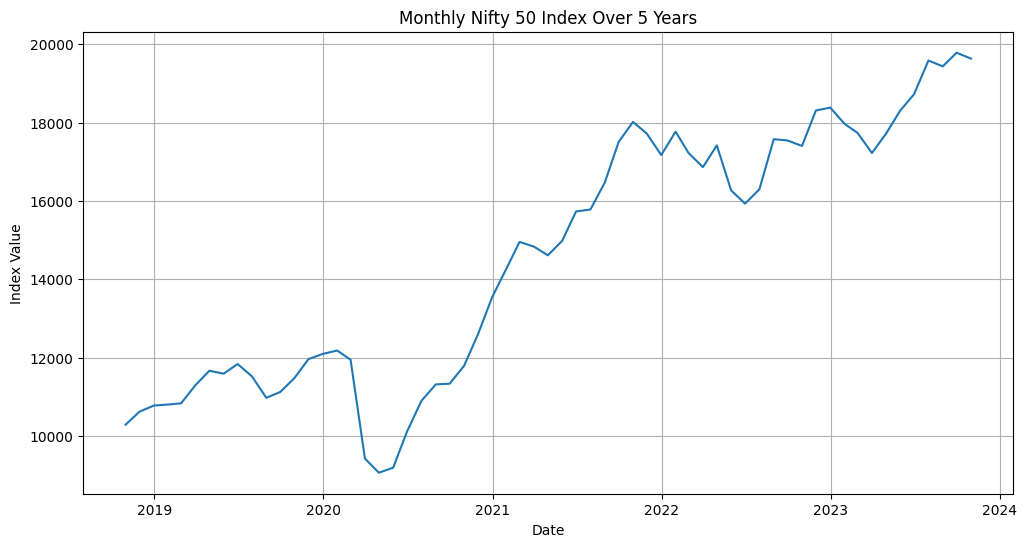

In [27]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Ticker symbol for Nifty 50 index
nifty_ticker = "^NSEI"

# Fetch historical Nifty 50 index data
data = yf.download(nifty_ticker, period="5y")

# Resample the data on a monthly basis to observe seasonality
monthly_data = data['Close'].resample('M').mean()

# Plot the monthly index values to observe seasonality
plt.figure(figsize=(12, 6))
plt.plot(monthly_data)
plt.title('Monthly Nifty 50 Index Over 5 Years')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.grid()
plt.show()


[*********************100%%**********************]  1 of 1 completed


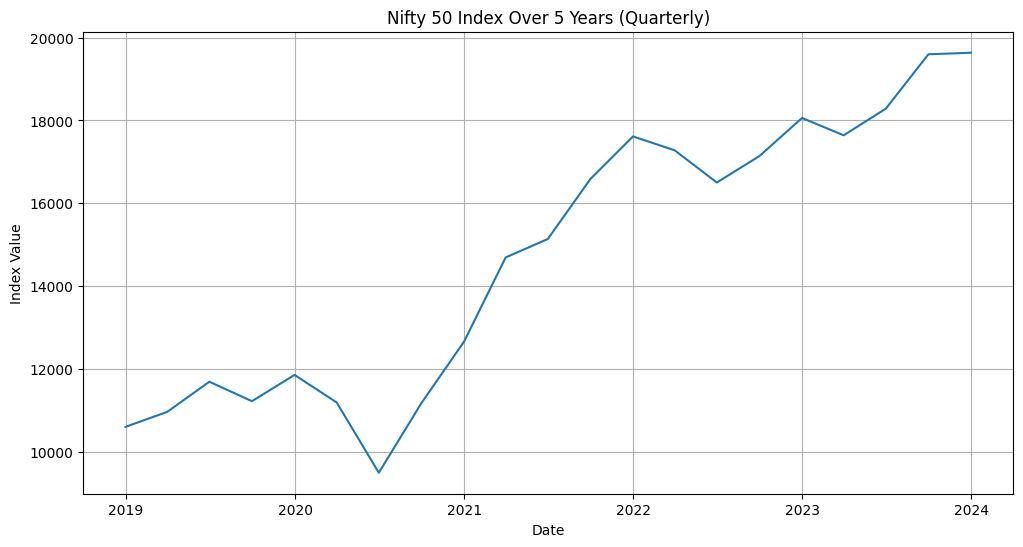

In [29]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Ticker symbol for Nifty 50 index
nifty_ticker = "^NSEI"

# Fetch historical Nifty 50 index data
data = yf.download(nifty_ticker, period="5y")

# Resample the data on a quarterly basis to observe seasonality
quarterly_data = data['Close'].resample('Q').mean()

# Plot the quarterly index values to observe seasonality
plt.figure(figsize=(12, 6))
plt.plot(quarterly_data)
plt.title('Nifty 50 Index Over 5 Years (Quarterly)')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.grid()
plt.show()


[*********************100%%**********************]  1 of 1 completed


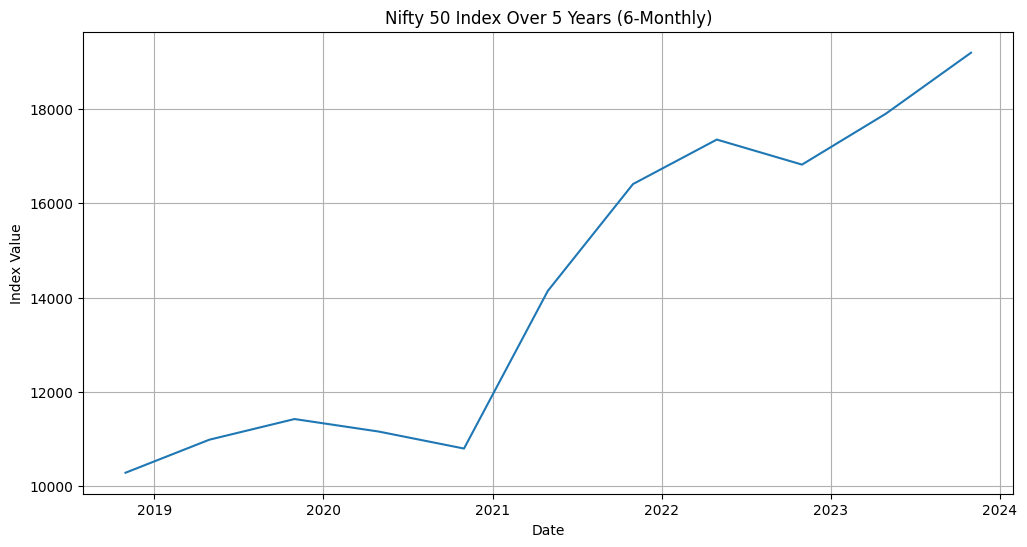

In [30]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Ticker symbol for Nifty 50 index
nifty_ticker = "^NSEI"

# Fetch historical Nifty 50 index data
data = yf.download(nifty_ticker, period="5y")

# Resample the data on a 6-month basis to observe seasonality
six_monthly_data = data['Close'].resample('6M').mean()

# Plot the 6-month index values to observe seasonality
plt.figure(figsize=(12, 6))
plt.plot(six_monthly_data)
plt.title('Nifty 50 Index Over 5 Years (6-Monthly)')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.grid()
plt.show()


[*********************100%%**********************]  1 of 1 completed


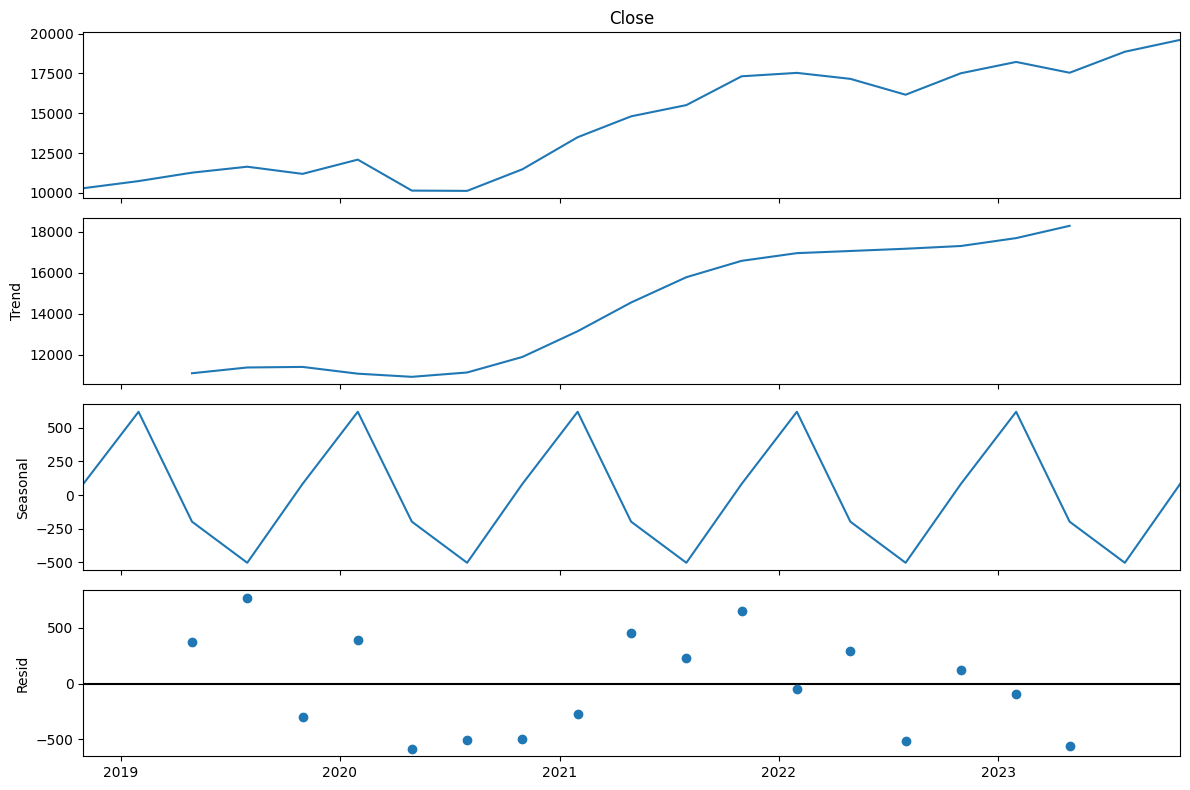

In [33]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm

# Ticker symbol for Nifty 50 index
nifty_ticker = "^NSEI"

# Fetch historical Nifty 50 index data
data = yf.download(nifty_ticker, period="5y")

# Resample the data on a 6-month basis to observe seasonality
six_monthly_data = data['Close'].resample('3M').mean().dropna()

# Seasonal decomposition
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(six_monthly_data, model='additive')  # Adjusted for 6-month data
fig = decomposition.plot()
plt.show()


[*********************100%%**********************]  1 of 1 completed


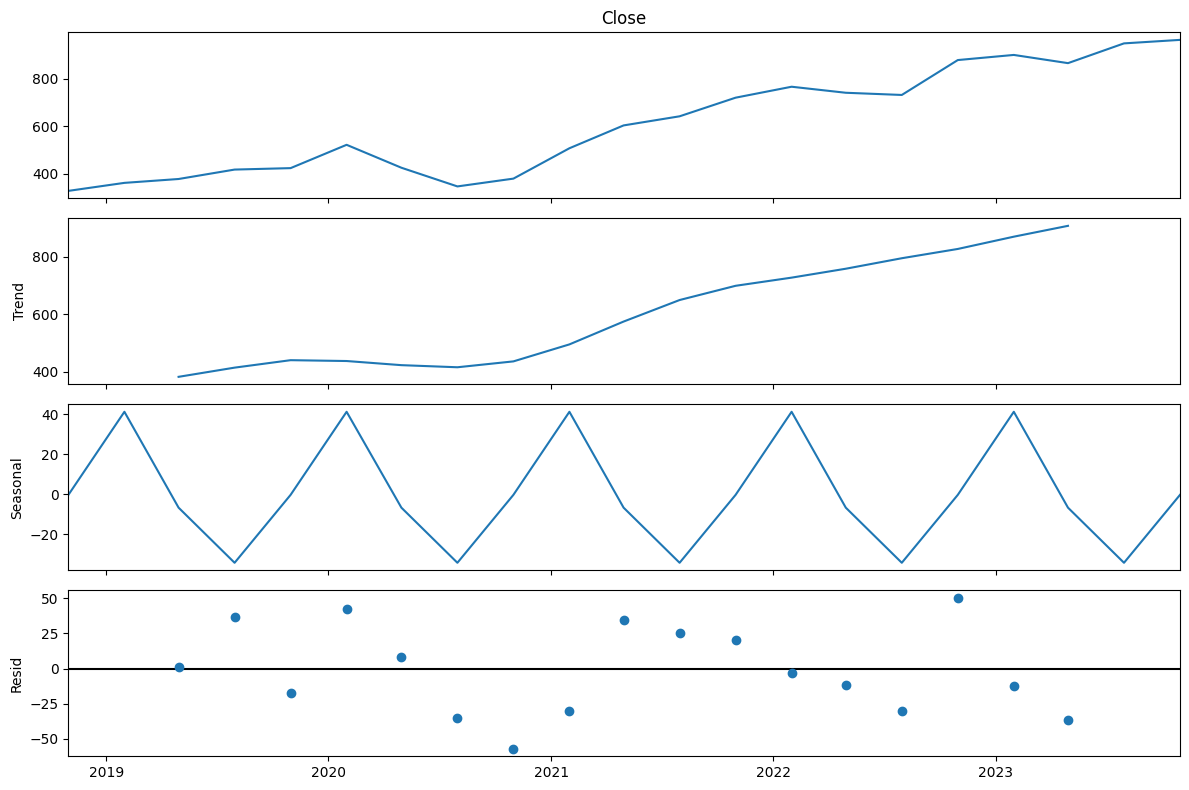

In [36]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm

# Ticker symbol for Nifty 50 index
nifty_ticker = "ICICIBANK.NS"

# Fetch historical Nifty 50 index data
data = yf.download(nifty_ticker, period="5y")

# Resample the data on a 6-month basis to observe seasonality
six_monthly_data = data['Close'].resample('3M').mean().dropna()

# Seasonal decomposition
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(six_monthly_data, model='additive')  # Adjusted for 6-month data
fig = decomposition.plot()
plt.show()

[*********************100%%**********************]  1 of 1 completed


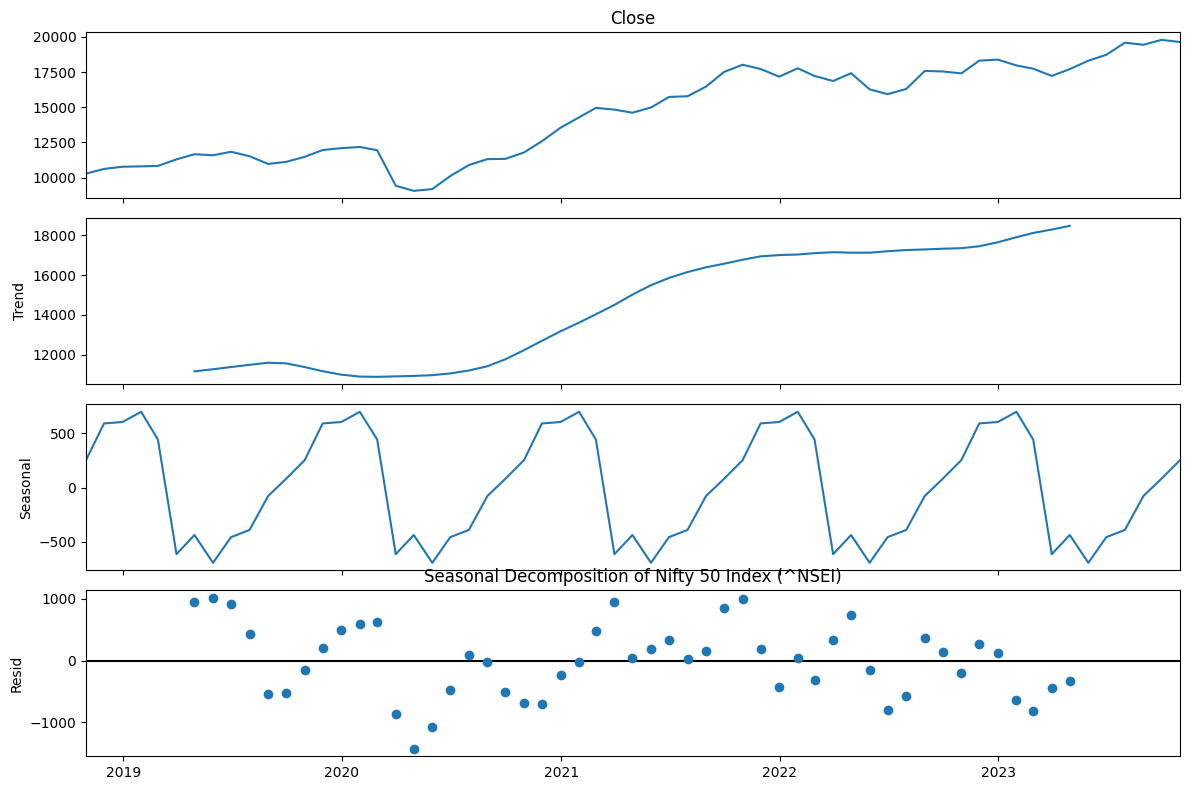

In [39]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm

# Ticker symbol for Nifty 50 index
nifty_ticker = "^NSEI"

# Fetch historical Nifty 50 index data
data = yf.download(nifty_ticker, period="5y")

# Resample the data on a 6-month basis to observe seasonality
six_monthly_data = data['Close'].resample('1M').mean().dropna()

# Seasonal decomposition
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(six_monthly_data, model='additive')  # Adjusted for 6-month data
fig = decomposition.plot()

# Add title with the ticker name
plt.title('Seasonal Decomposition of Nifty 50 Index (' + nifty_ticker + ')')

plt.show()


[*********************100%%**********************]  1 of 1 completed


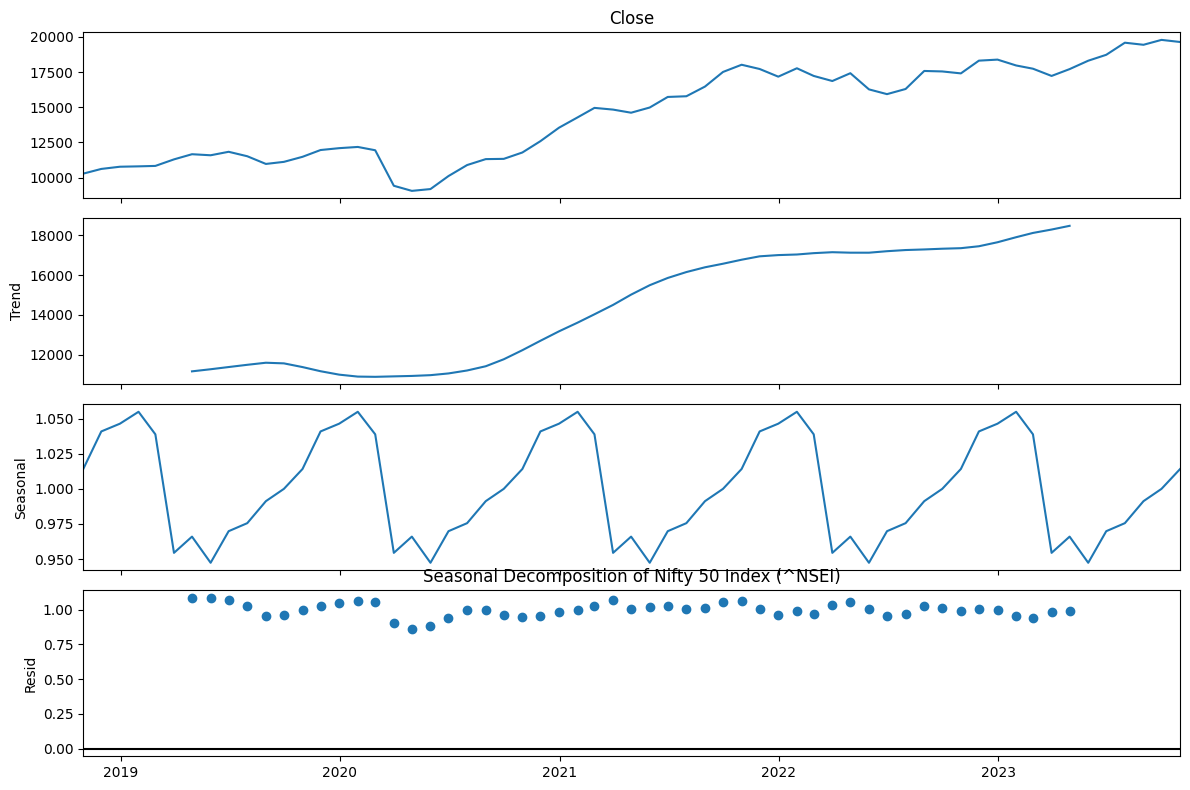

In [40]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm

# Ticker symbol for Nifty 50 index
nifty_ticker = "^NSEI"

# Fetch historical Nifty 50 index data
data = yf.download(nifty_ticker, period="5y")

# Resample the data on a 6-month basis to observe seasonality
six_monthly_data = data['Close'].resample('1M').mean().dropna()

# Seasonal decomposition
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(six_monthly_data, model='multiplicative')  # Adjusted for 6-month data
fig = decomposition.plot()

# Add title with the ticker name
plt.title('Seasonal Decomposition of Nifty 50 Index (' + nifty_ticker + ')')

plt.show()

## Build and evaluate time series forecast

## Split time series data into training and test set

In [47]:
data = stock
train_len = 1100
train = data[0:train_len] # first 120 months as training set
test = data[train_len:]

In [48]:
print(train.shape)
print(test.shape)

(1100, 6)
(133, 6)


## Naive method

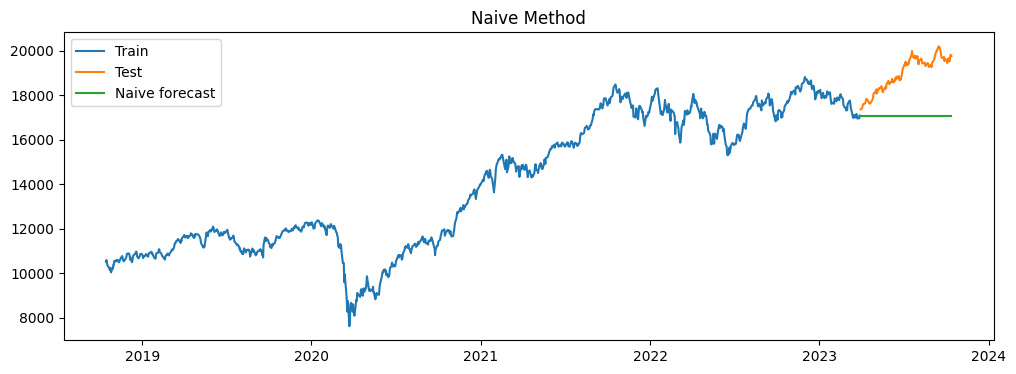

In [49]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Close'][train_len-1]
plt.figure(figsize=(12,4))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [50]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Close'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Close']-y_hat_naive['naive_forecast'])/test['Close'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,2051.19,9.92


## Simple average method

In [51]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Close'].mean()

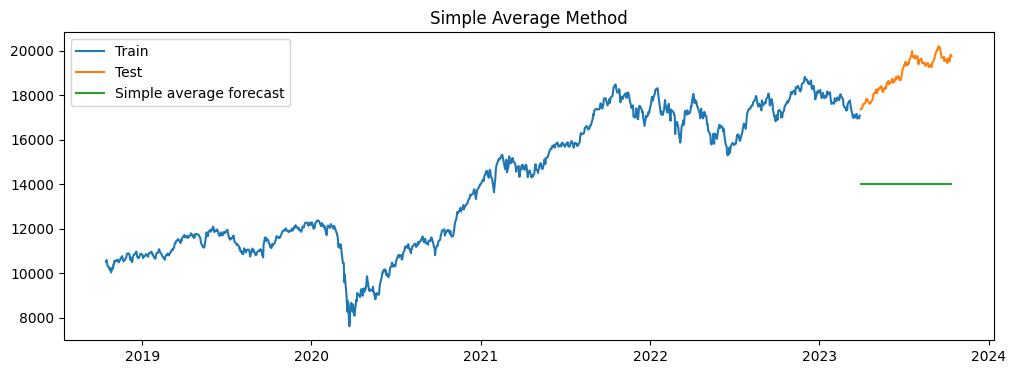

In [52]:
plt.figure(figsize=(12,4))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [55]:
rmse = np.sqrt(mean_squared_error(test['Close'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Close']-y_hat_avg['avg_forecast'])/test['Close'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,2051.19,9.92
0,Simple average method,5025.46,26.05


## Simple moving average method

In [56]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['Close'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

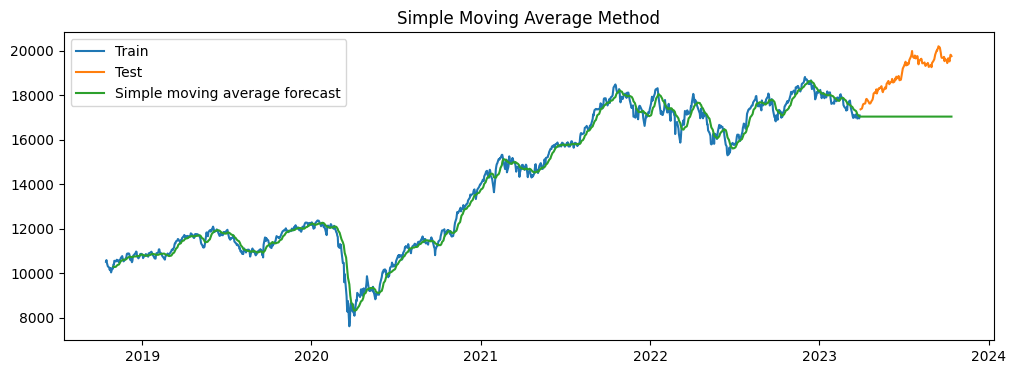

In [57]:
plt.figure(figsize=(12,4))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [59]:
rmse = np.sqrt(mean_squared_error(test['Close'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Close']-y_hat_sma['sma_forecast'][train_len:])/test['Close'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,2051.19,9.92
0,Simple average method,5025.46,26.05
0,Simple moving average forecast,2096.24,10.17


# Exponential smoothing methods

## Simple exponential smoothing

In [60]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Close'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


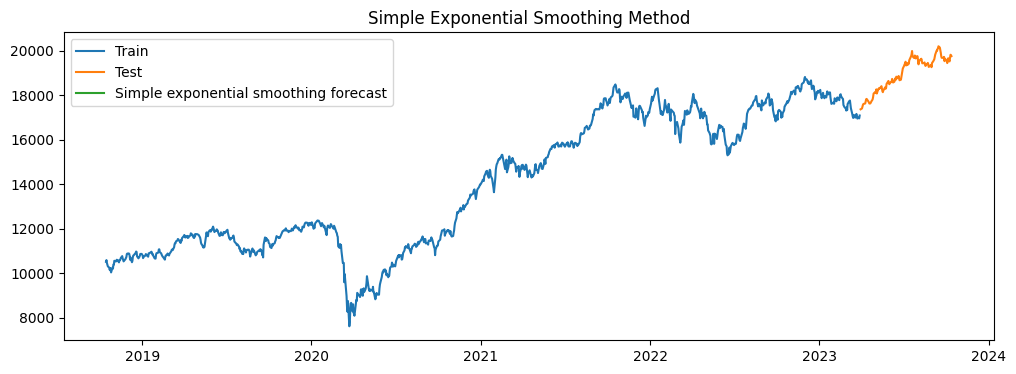

In [61]:
plt.figure(figsize=(12,4))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [62]:
rmse = np.sqrt(mean_squared_error(test['Close'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Close']-y_hat_ses['ses_forecast'])/test['Close'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

ValueError: ignored

In [66]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Ticker symbol for Nifty 50 index
nifty_ticker = "^NSEI"

# Fetch historical Nifty 50 index data
data = yf.download(nifty_ticker, period="5y")

# Ensure the date index has a valid frequency (daily in this case)
data.index.freq = 'D'

# Split the data into train and test sets
train_size = int(len(data) * 0.8)
train = data[:train_size]
test = data[train_size:]

# Simple exponential smoothing
model = SimpleExpSmoothing(train['Close'])
model_fit = model.fit(smoothing_level=0.2, optimized=False)
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test))

# Plot the results
plt.figure(figsize=(12, 4))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple Exponential Smoothing Forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Forecast for Nifty 50 Index')
plt.show()




[*********************100%%**********************]  1 of 1 completed


ValueError: ignored

[*********************100%%**********************]  1 of 1 completed


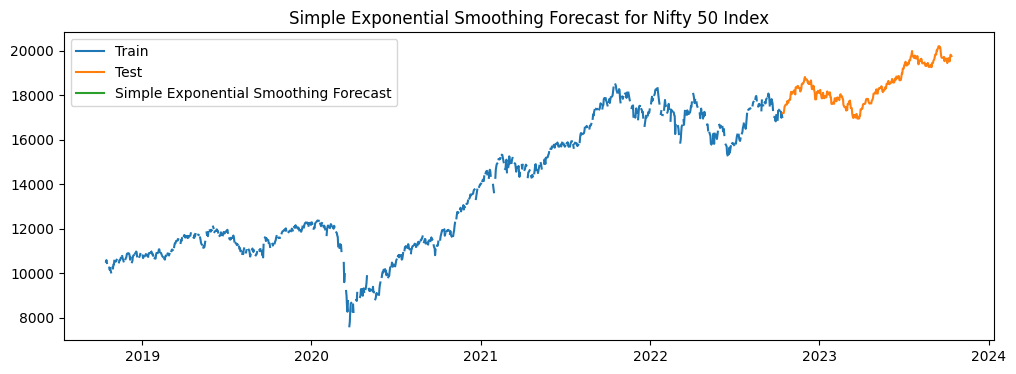

In [67]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Ticker symbol for Nifty 50 index
nifty_ticker = "^NSEI"

# Fetch historical Nifty 50 index data
data = yf.download(nifty_ticker, period="5y")

# Ensure the date index has a valid frequency (daily in this case)
data = data['Close'].asfreq('D')

# Split the data into train and test sets
train_size = int(len(data) * 0.8)
train = data[:train_size]
test = data[train_size:]

# Handle missing values in the test set (if any)
test = test.fillna(method='ffill')

# Simple exponential smoothing
model = SimpleExpSmoothing(train)
model_fit = model.fit(smoothing_level=0.2, optimized=False)
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test))

# Plot the results
plt.figure(figsize=(12, 4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple Exponential Smoothing Forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Forecast for Nifty 50 Index')
plt.show()


In [68]:
y_hat_ses

Date
2022-10-14 00:00:00                                         17185.699219
2022-10-15 00:00:00                                         17185.699219
2022-10-16 00:00:00                                         17185.699219
2022-10-17 00:00:00                                         17311.800781
2022-10-18 00:00:00                                         17486.949219
                                             ...                        
2023-10-10 00:00:00                                         19689.849609
2023-10-11 00:00:00                                         19811.349609
2023-10-12 00:00:00                                              19794.0
2023-10-13 00:00:00                                         19751.050781
ses_forecast           2022-10-14   NaN
2022-10-15   NaN
2022-10-16  ...
Name: Close, Length: 366, dtype: object